In [7]:
aa = 100
u1 = 1 * aa  # mean of deltaGadd for each protein  -- means that deltaGadd per aa is 0.2
var1 = 1 * aa  # variance of deltaGadd -- means that variance per aa is 0.3

u2 = 0  # mean of deltaGepi for each protein 
var2 = aa * (aa - 1) * 0.5 * 0.0003  # variance of deltaGepi -- means that variance per pair of aa is 50/(100*99/2) = 0.001

In [ ]:
# what is the distribution of deltaGadd for proteins that fold?

In [21]:
get_folding_proteins = function(aa=100) {
    u1 = 1 * aa  # mean of deltaGadd for each protein  -- means that deltaGadd per aa is 0.2
    # the paper says that per aa, u1 = 1 and var1 = 1 and var2 = 0.003
    var1 = 1 * aa  # variance of deltaGadd -- means that variance per aa is 0.3

    u2 = 0  # mean of deltaGepi for each protein 
    var2 = aa * (aa - 1) * 0.5 * 0.3  # variance of deltaGepi -- means that variance per pair of aa is 50/(100*99/2) = 0.001

    num_sim = 1e5
    list_deltaG = c()
    list_deltaGadd = c()
    for (i in seq(num_sim)) {
        deltaGadd = rnorm(1,u1,sqrt(var1))
        deltaGepi = rnorm(1,u2,sqrt(var2))
        if (deltaGadd + deltaGepi < 0) {
            list_deltaG = append(list_deltaG, deltaGadd + deltaGepi)
            list_deltaGadd = append(list_deltaGadd, deltaGadd)
        }
    }
    
    return(list(list_deltaG, list_deltaGadd))
}


In [22]:
length(get_folding_proteins(400)[[1]])

[1] 525

In [23]:
sum(rnorm(1e5,0.2*10,sqrt())<0)  # 90% of folded proteins with length 10 already have additive <0

[1] 12500

In [37]:
sum(rnorm(1e5,400,sqrt(40000))<0)  # 90% of folded proteins with length 10 already have additive <0

[1] 2339

In [35]:
rnorm(10,400,sqrt(4000))

[1] 447.7882 512.0210 404.0479 413.1307 409.6849 315.0807 532.3325 379.0785
 [9] 355.5066 379.2562

In [34]:
sqrt(400*399/2*0.0003)

[1] 4.892852

In [24]:
info_10 = get_folding_proteins(10)

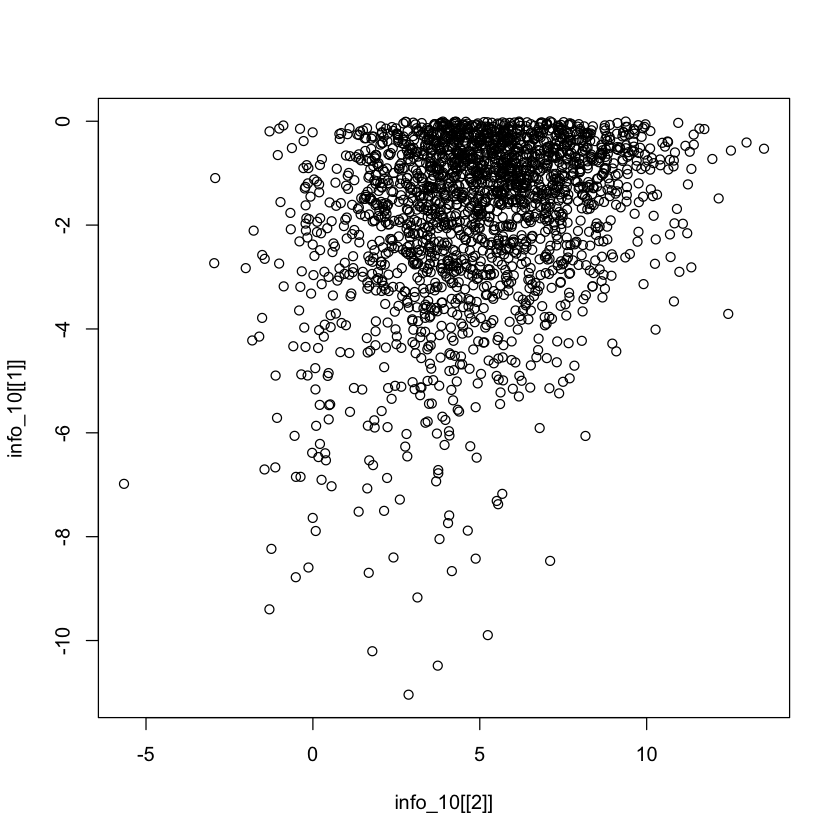

In [25]:
plot(info_10[[2]], info_10[[1]])

In [16]:
length(get_folding_proteins(100)[[1]])

[1] 0

In [17]:
sum(rnorm(1e5,0.2*100,sqrt(0.3*100))<0) # here 99% of sequences with length 100 fold only because of epistasis

[1] 9

In [15]:
length(get_folding_proteins(1000)[[1]])

[1] 0

In [44]:
length(get_folding_proteins(10000)[[1]])

[1] 244

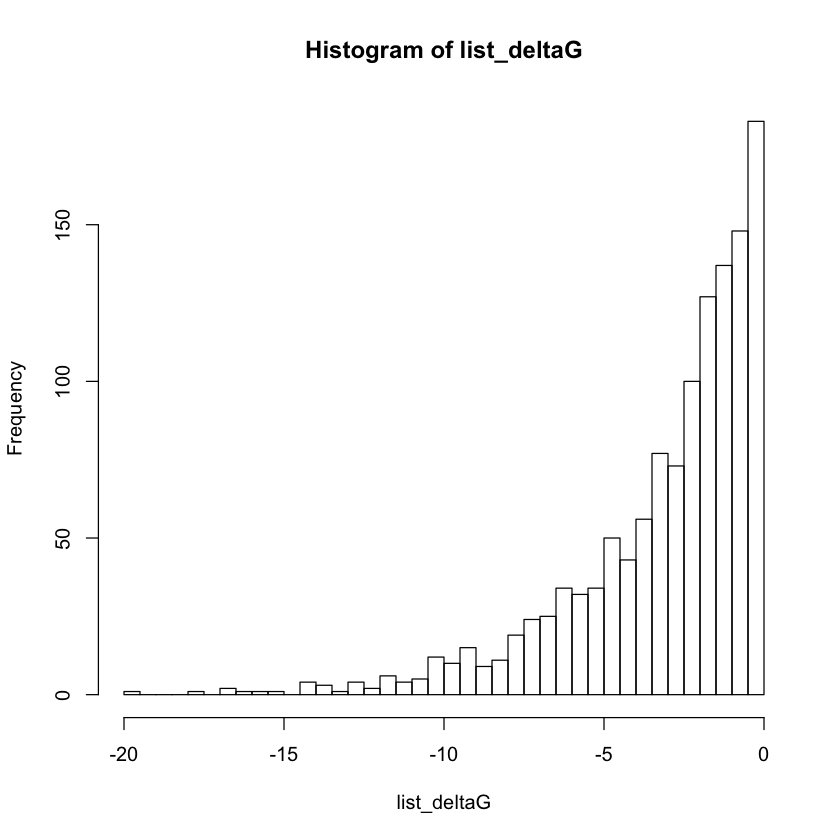

In [21]:
hist(list_deltaG, breaks=50)

In [18]:
plot(list_deltaGadd, list_deltaG, xlim=c(-20,20), ylim=c(-20,20))

ERROR: Error in plot(list_deltaGadd, list_deltaG, xlim = c(-20, 20), ylim = c(-20, : object 'list_deltaGadd' not found


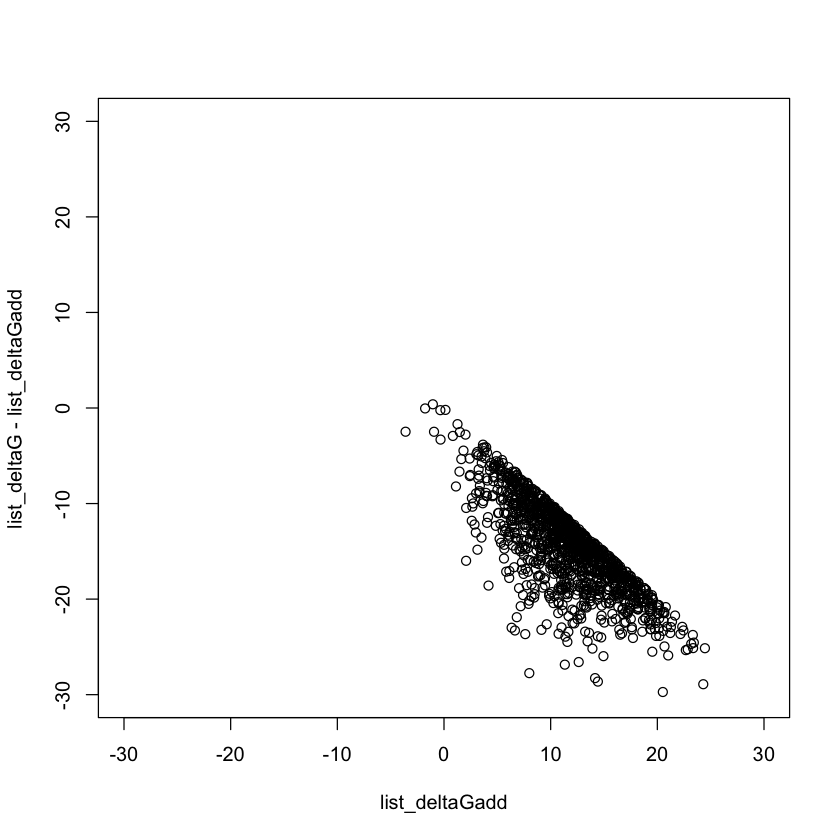

In [29]:
plot(list_deltaGadd, list_deltaG - list_deltaGadd, xlim=c(-30,30), ylim=c(-30,30))